In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np   # 배열 사용할 때 numpy
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


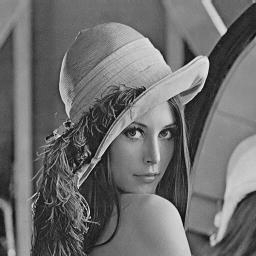

In [2]:
img = cv2.imread('/content/gdrive/My Drive/images/lena256.jpg')
print(img.shape)
gimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gimg)

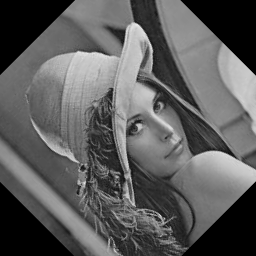

In [3]:
M = cv2.getRotationMatrix2D((128,128),45,1)
outImg = cv2.warpAffine(gimg,M,(256,256))
cv2_imshow(outImg)

In [4]:
print(M)
print(M.shape)

[[  0.70710678   0.70710678 -53.01933598]
 [ -0.70710678   0.70710678 128.        ]]
(2, 3)


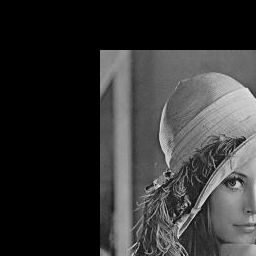

In [5]:
# 평행이동 행렬 (x 방향으로 +100, y 방향으로 +50 이동)
M = np.float32([[1, 0, 100],
                [0, 1, 50]])
# 이미지 변환
outImg = cv2.warpAffine(gimg, M, (256, 256))
# 결과 출력
cv2_imshow(outImg)

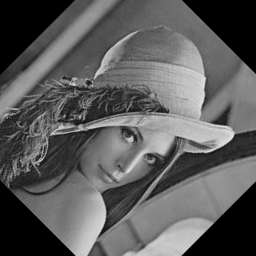

In [6]:
M = cv2.getRotationMatrix2D((128,128),-45,1)
outImg = cv2.warpAffine(gimg,M,(256,256))
cv2_imshow(outImg)

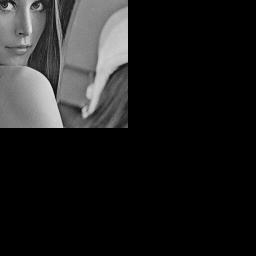

In [7]:
M1 = np.float32([[1, 0, -128],[0, 1, -128]])
outImg1 = cv2.warpAffine(gimg,M1,(256,256))
cv2_imshow(outImg1)

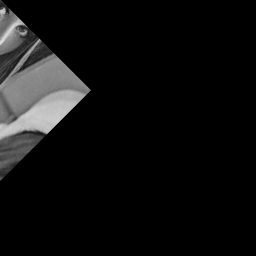

In [8]:
M2 = cv2.getRotationMatrix2D((0,0),-45,1)
outImg2 = cv2.warpAffine(outImg1,M2,(256,256))
cv2_imshow(outImg2)

In [9]:
print(M1)
print(M2)

[[   1.    0. -128.]
 [   0.    1. -128.]]
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]]


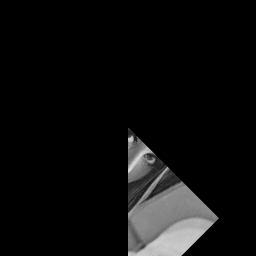

In [11]:
M3 = np.float32([[1, 0, 128],[0, 1, 128]])
outImg3 = cv2.warpAffine(outImg2,M3,(256,256))
cv2_imshow(outImg3)

In [12]:
N1 = np.float32([
    [M1[0,0], M1[0,1], M1[0,2]],
    [M1[1,0], M1[1,1], M1[1,2]],
    [0, 0, 1]
])

N2 = np.float32([
    [M2[0,0], M2[0,1], M2[0,2]],
    [M2[1,0], M2[1,1], M2[1,2]],
    [0, 0, 1]
])

N3 = np.float32([
    [M3[0,0], M3[0,1], M3[0,2]],
    [M3[1,0], M3[1,1], M3[1,2]],
    [0, 0, 1]
])

print(N1)
print(N2)
print(N3)

[[   1.    0. -128.]
 [   0.    1. -128.]
 [   0.    0.    1.]]
[[ 0.70710677 -0.70710677  0.        ]
 [ 0.70710677  0.70710677  0.        ]
 [ 0.          0.          1.        ]]
[[  1.   0. 128.]
 [  0.   1. 128.]
 [  0.   0.   1.]]


이전에 cv2.warpAffine에서 오류를 발생시킨 N6의 정의는 다음과 같습니다. 이 코드를 실행하면 동일한 오류가 발생할 것입니다.

In [13]:
# N4와 N5는 이전 실행에서 이미 정의되어 있다고 가정합니다.
# N4 = np.dot(N3, N2)
# N5 = np.dot(N4, N1)

# 오류를 발생시킨 N6의 잘못된 정의
# 3x3 행렬 N5에서 첫 두 행의 요소들을 1D 배열로 잘못 나열했습니다.
N6_error = np.float32([N5[0,0],N5[0,1],N5[0,2],N5[1,0],N5[1,1],N5[1,2]])
print(f"N6_error shape: {N6_error.shape}")

# 이 코드를 실행하면 'Assertion failed' 오류가 발생합니다.
# (N0.type() == CV_32F || N0.type() == CV_64F) && N0.rows == 2 && N0.cols == 3
# cv2.warpAffine(gimg, N6_error, (256, 256))


NameError: name 'N5' is not defined

이 코드는 cv2.warpAffine에서 N6의 잘못된 형태로 인해 발생했던 오류를 재현합니다.

In [14]:
# N4와 N5는 이전 실행에서 이미 정의되어 있다고 가정합니다.
# 이 코드는 이전의 잘못된 N6 정의를 재현합니다.
N6_error_reproduced = np.float32([N5[0,0],N5[0,1],N5[0,2],N5[1,0],N5[1,1],N5[1,2]])
print(f"N6_error_reproduced shape: {N6_error_reproduced.shape}")

# 이 코드를 실행하면 'Assertion failed' 오류가 발생합니다.
# (N0.type() == CV_32F || N0.type() == CV_64F) && N0.rows == 2 && N0.cols == 3
# 이는 cv2.warpAffine이 2x3 형태의 변환 행렬을 기대하기 때문입니다.
cv2.warpAffine(gimg, N6_error_reproduced, (256, 256))

NameError: name 'N5' is not defined